In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pickle
import ast
import pandas
import json
from numpy import array
import timeit  
import nbimporter
import auto_encoder as aec
np.set_printoptions(suppress=True)

Importing Jupyter notebook from auto_encoder.ipynb


In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [ ]:
# Linking Id's
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\links.csv")
links = pandas.read_csv(data_path)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies_metadata.csv")
movie_meta = pandas.read_csv(data_path)

joined = links.set_index('tmdbId').join(movie_meta.set_index('id'))

writer = pandas.ExcelWriter('output.xlsx')
joined.to_excel(writer,'Sheet1')
writer.save()
'''
x = 3

In [ ]:
# Cleaning less-voted movies from ratings.csv
'''
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\ratings.csv")
rating = pandas.read_csv(data_path, engine='python')

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount.csv")
vote_count = pandas.read_csv(data_path)

votes = column(vote_count.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

file = open("ratings_updated", "wb")
pickle.dump(ratings_updated, file)
'''

In [ ]:
# Cleaning less-voted movies from ratings.csv
'''
ratings2 = ratings.groupby("userId").count()
ratings2.sort_values("movieId", ascending=False)
writer = pandas.ExcelWriter('user_votecount.xlsx')
ratings2.to_excel(writer,'Sheet1')
writer.save()

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated = ratings.loc[ratings["userId"].isin(votes)]
'''

In [ ]:
file = open("ratings_updated", "rb")
rating = pickle.load(file)
rating

In [ ]:
project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movie_votecount2.csv")
movie_vote = pandas.read_csv(data_path)
votes = column(movie_vote.values, 0)
ratings_updated = rating.loc[rating["movieId"].isin(votes)]

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\user_votecount2.csv")
user_vote = pandas.read_csv(data_path)

votes = column(user_vote.values, 0)
ratings_updated = ratings_updated.loc[rating["userId"].isin(votes)]
file = open("ratings_updated_2", "wb")
pickle.dump(ratings_updated, file)

In [ ]:
# Movie matrix build
movies = ratings_updated["movieId"]
movies = set(movies)
movies = sorted(movies, key=lambda x: int(x), reverse=False)

In [ ]:
# User matrix build
users = ratings_updated["userId"]
users = set(users)
users = sorted(users, key=lambda x: int(x), reverse=False)

In [ ]:
# User-movie matrix build
user_movie = np.zeros((len(users),len(movies)), dtype=float)

project_root = os.path.dirname(os.path.abspath(""))
data_path = os.path.join(project_root, "data\\movies.csv")
movies_meta = pandas.read_csv(data_path, encoding = "ISO-8859-1")

In [ ]:
for i in range(len(movies)):
    rating_of_i = (movies_meta.loc[movies_meta["movieId"] == movies[i]])["vote_average"].values[0]
    x = np.full((len(users),), rating_of_i / 2, dtype=float)
    user_movie[:,i] = x

for index, row in ratings_updated.iterrows():
    user_movie[users.index(row['userId'])][movies.index(row['movieId'])] = row['rating']
    
print(np.shape(user_movie))
file = open("user_movie", "wb")
pickle.dump(user_movie, file)

In [2]:
file = open("user_movie", "rb")
user_movie = pickle.load(file)

In [ ]:
neuron_list = [499,250,125,250,499]
nn = aec.Autoencoder(neuron_list)
inp = np.transpose([np.transpose(user_movie)])

# Load trained-weights
file = open("epoch10_weights", "rb")
weights = pickle.load(file)
nn.weights = weights

features = []
for i in range(len(user_movie)):
    encoded = nn.encode(inp[i])
    features.append(encoded)

user_features = []
for i in range(len(users)):
    user_features.append([users[i], features[i]])
file = open("user_features", "wb")
pickle.dump(user_features, file)

(1000, 499, 1)
Epoch: 0
Error: 53.76288504661971
Epoch: 1
Error: 61.115320485662764
Epoch: 2
Error: 61.11532032723986
Epoch: 3
Error: 61.11532016881683
Epoch: 4
Error: 61.11532001039381
Epoch: 5
Error: 61.115319851970874
Epoch: 6
Error: 61.11531969354789
Epoch: 7
Error: 61.11531953512505
Epoch: 8
Error: 61.115319376702026
Epoch: 9
Error: 61.11531921827915


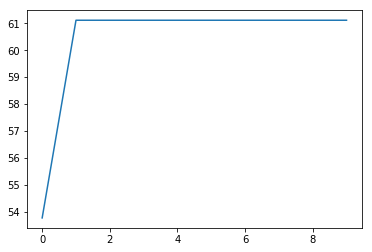

[53.76288504661971, 61.115320485662764, 61.11532032723986, 61.11532016881683, 61.11532001039381, 61.115319851970874, 61.11531969354789, 61.11531953512505, 61.115319376702026, 61.11531921827915]


In [12]:
neuron_list = [499,250,125,250,499]
nn = aec.Autoencoder(neuron_list, 0.002, 300)
inp = np.transpose([np.transpose(user_movie)])
print(np.shape(inp))
err = nn.train(inp,inp, 10)
plt.plot(err)
plt.show()
print(err)

In [ ]:
file = open("epoch10_weights", "wb")
pickle.dump(nn.weights, file)

In [ ]:
file = open("epoch10_autoencoder", "wb")
pickle.dump(nn, file)

In [ ]:
file = open("error_epoch_10", "rb")
error = pickle.load(file)

In [ ]:
error = [float(y) for x in error for y in x]

In [ ]:
error = np.reshape(error, (10,1000))

In [ ]:
for i in range(len(error)):
    print("Epoch " + str(i+1) + " error: " +  str(np.mean(error[i])))